# Hyper Parameter Tuning

Hyper parameters are the parameters of the learning model that are not learned during the training process. These parameters must be finetuned separately.

In scikit-learn hyper parameters parameters are passed as arguments to the constructor of the estimator while instanciating the estimators (learners).

To know the parameters that can be passed to a constructor, we can use the signature function as shown below.

## Signature of a function

Signature of a function is named so because it idendifies the function uniquely. A function's signature includes the function's name, and the number, order and type of its arguments.

In [1]:
from inspect import signature
from sklearn.neighbors import KNeighborsClassifier
sign = signature(KNeighborsClassifier)
print(sign)

(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)


Note that for the `KNeighborsClassifier`, the argument `n_neighbors` is the hyper parameter that must be tuned.

## Grid Search

Grid Search performs the search for the best values of the parameters in the specified search space and outputs the combination of parameter values that optimize the specified score function.

The `GridSearchCV` function of the `model_selection` module of Scikit-Learn performs the grid search using cross validation.

### Hyper parameter tuning for KNN Classifier

We will fine tune the hyper parameters of KNN classifier for the classification problem involving the Breast Cancer data.

Recall that hyper parameter tuning should be carried out only using the training data.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
bc = datasets.load_breast_cancer()
X = bc.data
y = 1 - bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 854987)

We need to specify the grid for performing the grid search. The grid can be specified as the `param_grid` argument to the function implementing grid search (`GridSearchCV` in this case). `param_grid` argument is a dict object with the parameters as the keys.

In [3]:
param_grid = {'n_neighbors':range(1,20)}
GS = GridSearchCV(KNeighborsClassifier(), param_grid, scoring = 'precision')
GS.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)}, scoring='precision')

The `fit` method of `GridSearchCV` performs the grid search. Once the grid search is performed, the optimal hyper parameter values are available in the `best_params_` attribute, a dict object.

In [4]:
GS.best_params_

{'n_neighbors': 2}

The optimal performance achieved, as measured using the specified `scoring` method, in the `best_score_` attribute.

In [5]:
GS.best_score_

0.9698005698005698

The detailed results of the grid search are available in the `cv_results_` attribute, which can be converted in pandas DataFrame as shown below.

In [6]:
import pandas as pd
gsResult = pd.DataFrame(GS.cv_results_)
gsResult

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001399,4.889087e-04,0.017189,0.006550,1,{'n_neighbors': 1},1.000000,0.928571,0.960000,0.888889,0.787879,0.913068,0.072467,19
1,0.000400,4.897457e-04,0.009195,0.001938,2,{'n_neighbors': 2},1.000000,1.000000,1.000000,0.923077,0.925926,0.969801,0.036998,1
2,0.000801,4.004503e-04,0.009792,0.001599,3,{'n_neighbors': 3},1.000000,0.964286,0.961538,0.923077,0.787879,0.927356,0.073867,18
3,0.001200,3.998524e-04,0.009794,0.001938,4,{'n_neighbors': 4},1.000000,1.000000,1.000000,0.923077,0.892857,0.963187,0.046088,2
4,0.000999,6.321081e-04,0.008595,0.001019,5,{'n_neighbors': 5},0.958333,1.000000,0.960000,0.923077,0.866667,0.941615,0.044693,17
5,0.001199,3.995896e-04,0.009394,0.001356,6,{'n_neighbors': 6},0.958333,1.000000,1.000000,0.923077,0.920000,0.960282,0.035116,13
6,0.000799,3.996853e-04,0.009994,0.002279,7,{'n_neighbors': 7},0.958333,0.964286,1.000000,0.923077,0.920000,0.953139,0.029493,15
7,0.001000,1.480501e-06,0.009793,0.002314,8,{'n_neighbors': 8},1.000000,0.964286,1.000000,0.923077,0.920000,0.961473,0.035131,3
8,0.001199,3.993279e-04,0.010393,0.001199,9,{'n_neighbors': 9},1.000000,0.964286,1.000000,0.923077,0.888889,0.955250,0.043648,14
9,0.001000,1.377061e-06,0.009194,0.001936,10,{'n_neighbors': 10},1.000000,0.962963,1.000000,0.923077,0.920000,0.961208,0.035114,4


<AxesSubplot:xlabel='param_n_neighbors'>

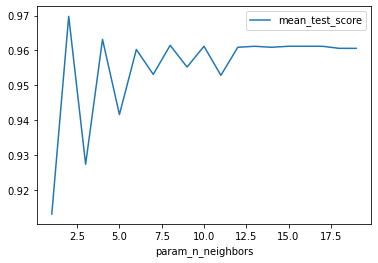

In [7]:
gsResult.plot('param_n_neighbors', 'mean_test_score')

### Use the Optimal hyper parameter

Once the hyper parameter is fine tuned. We can use it for the chosen classifier `KNeighborsClassifier` as shown below.

In [8]:
from sklearn.metrics import precision_score
KNNClassifier = KNeighborsClassifier(n_neighbors=2)
KNNClassifier.fit(X_train, y_train)
y_pred = KNNClassifier.predict(X_test)
precision_score(y_test, y_pred)

0.921875

### Exercise
Use `wine` data set to perform wine classification using KNN Classification.